# Diabetes Prediction and Analysis

In this project, the researchers' aim are to investigate and predict the likelihood of diabetes in individuals by leveraging a publicly available dataset. The researchers' approach involves conducting comprehensive exploratory data analysis, comparing key health metrics between diabetic and non-diabetic groups, and developing machine learning models for prediction. 

The primary objective is to identify significant health indicators linked to diabetes and to construct reliable models that can support early detection efforts.


**Dataset used:**

    Clinical health records
    Key features: gender, age, hypertension, heart_disease, smoking_history, bmi, HbA1c_level, blood_glucose_level
    Target Variable: diabetes
    

**Key Analytics Questions Solved:**

    Q1: How does diabetes prevalence vary across age groups and genders?
    Q2: Which features are most important for predicting diabetes?
    Q3: What is the average level based from the top predictors in diabetic vs non-diabetic people?
    

**Project Methodology:**

    Age binning to group population by age ranges
    Gender-wise and age-group-wise visual comparison using seaborn.countplot
    Boxplot visualization of key metrics: BMI, glucose, HbA1c
    Summary statistics comparison between diabetic and non-diabetic individuals
    Feature importance analysis using three machine learning classifiers

**Models used:**

    KNN
    Logistic Regression (L1 and L2)
    SVM (L1 and L2)
 

**Top Predictors:**


**Researchers:**

    Maghinay, Shane
    Pesaras, Nilmar
    Baguio, Ryan
    Ventic


**Definition of Terms**

**gender:** refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes.

**age:** an important factor as diabetes is more commonly diagnosed in older adults. Age ranges from 0-80 in our dataset.

**hypertension:** medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

**heart_disease:** another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.

**smoking_history:** considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

**bmi (Body Mass Index):** a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese. 

**HbA1c_level (Hemoglobin A1c):** measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

**blood_glucose_level:** refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

**diabetes:** target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.


<center> --------------------------------------------------------------------------------- <center>

## Import Libraries

In [198]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split



## Load Data

In [199]:
data_set = pd.read_csv('diabetes_prediction_dataset.csv')

data_set

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


## Data Exploration

In [200]:
print("Shape of Dataset (Rows, Columns):", data_set.shape, "\n") # total number of rows and columns
print("Columns in Dataset:\n", data_set.columns, "\n") # names of columns
print("First 5 Rows:\n", data_set.head(), "\n")

Shape of Dataset (Rows, Columns): (100000, 9) 

Columns in Dataset:
 Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object') 

First 5 Rows:
    gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0   



In [201]:
# Check for Missing Values
print("Missing values per column:")
print(data_set.isnull().sum())

# Find data types
print("\nData types of each column:")
print(data_set.dtypes)


Missing values per column:
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

Data types of each column:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


## Preprocessing

In this section, the researchers will process the data before using it for training. The researchers will do the following:
1. Removing duplicates
2. Encoding Categorical Data
3. Handling Outliers
4. Scaling numerical features
5. Correlation Matrix

### Removing duplicates

In [202]:
# Check for duplicate values
print("\nDuplicate values:" , data_set.duplicated().sum())


Duplicate values: 3854


**Findings:**

    Base from the above result, there are `3854` duplicates. This will lead to:
    1. Training Bias -> becomes biased toward patterns in frequently repeated observations.
    2. Overfitting -> Reduced the ability to perform well on new, unseen data.
    3. Distorted Feature Importance -> lead to incorrect conclusions about which health indicators truly predicted diabetes.

In [203]:
# Remove duplicate values

data_set.drop_duplicates(inplace=True)

# Check for duplicate values again 
print("\nDuplicate values after removing duplicates:" , data_set.duplicated().sum())

data_set.isnull().sum() # Check for missing values again


Duplicate values after removing duplicates: 0


gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### Encoding Categorical data

In [204]:
print("Before Encoding:\n")
# Show data types
print(data_set.dtypes)


# Age
le = LabelEncoder()
data_set['gender']= le.fit_transform(data_set['gender'])

# Smoking History
data_set = pd.get_dummies(data_set,columns=['smoking_history'],drop_first=True)

print("\n---------------------------------------------------------------------\n")

print("After Encoding:\n")

# Verify
print(data_set.dtypes)

Before Encoding:

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

---------------------------------------------------------------------

After Encoding:

gender                           int64
age                            float64
hypertension                     int64
heart_disease                    int64
bmi                            float64
HbA1c_level                    float64
blood_glucose_level              int64
diabetes                         int64
smoking_history_current           bool
smoking_history_ever              bool
smoking_history_former            bool
smoking_history_never             bool
smoking_history_not current       bool
dtype: object


### Scaling Numerical Features

In [205]:
numerical_columns = ['age','bmi', 'HbA1c_level', 'blood_glucose_level']

scaler = MinMaxScaler()

data_set[numerical_columns] = scaler.fit_transform(data_set[numerical_columns])

# Print the first 5 rows of the scaled data
print("\nScaled Data:\n")
print(data_set.head())


Scaled Data:

   gender       age  hypertension  heart_disease       bmi  HbA1c_level  \
0       0  1.000000             0              1  0.177171     0.563636   
1       0  0.674675             0              0  0.202031     0.563636   
2       1  0.349349             0              0  0.202031     0.400000   
3       0  0.449449             0              0  0.156863     0.272727   
4       1  0.949950             1              1  0.118231     0.236364   

   blood_glucose_level  diabetes  smoking_history_current  \
0             0.272727         0                    False   
1             0.000000         0                    False   
2             0.354545         0                    False   
3             0.340909         0                     True   
4             0.340909         0                     True   

   smoking_history_ever  smoking_history_former  smoking_history_never  \
0                 False                   False                   True   
1                 F

### Correlation Matrix

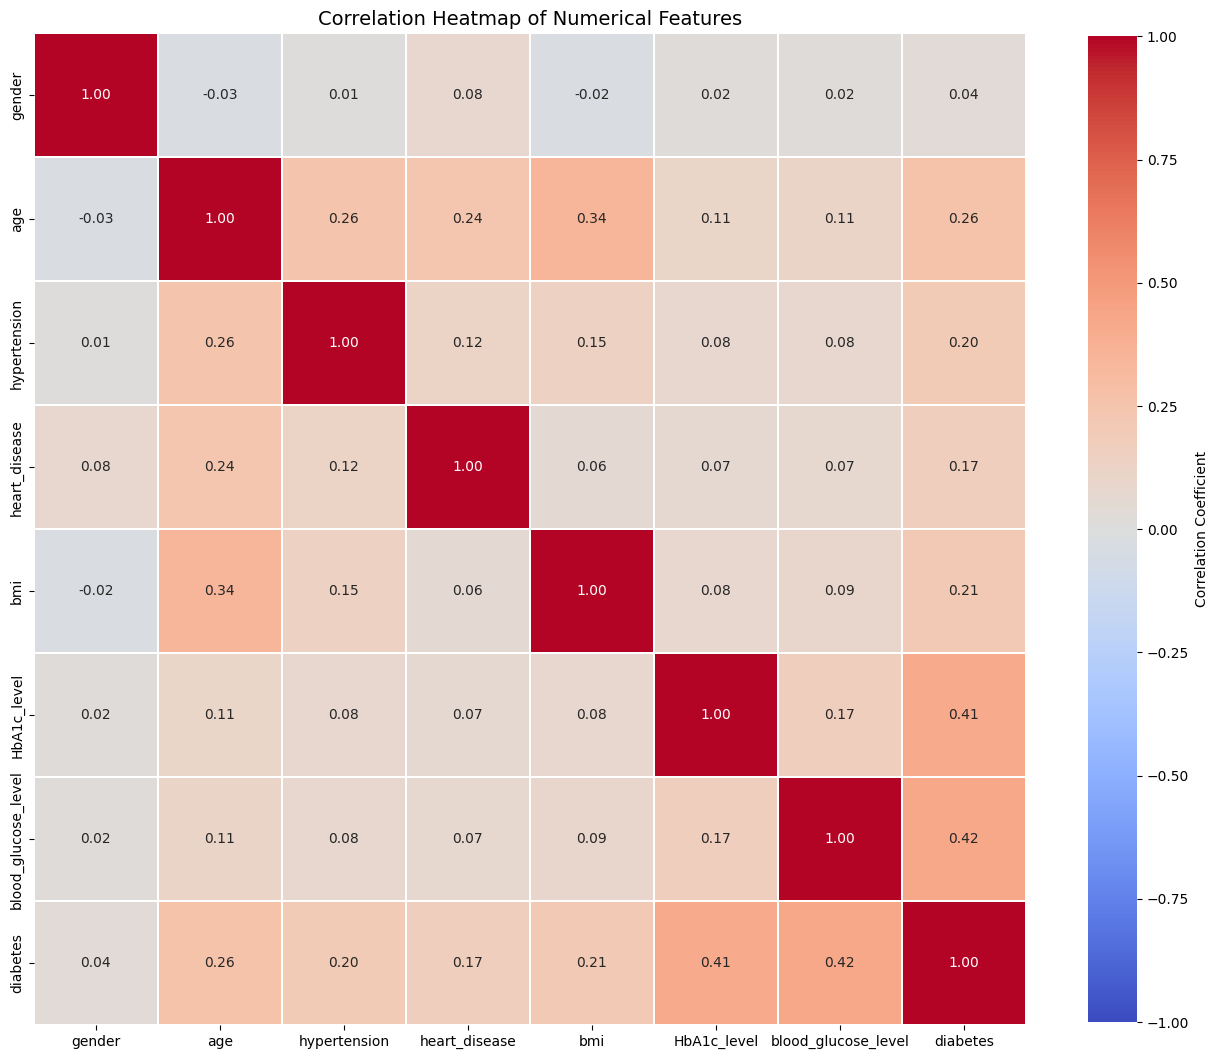

In [206]:
numerical_columns = data_set.select_dtypes(include=[np.number]).columns # Select numerical columns

corr_matrix = data_set[numerical_columns].corr() # Calculate correlation matrix

missing_cols = data_set[numerical_columns].isnull().sum() # Count missing values in each column
missing_cols = missing_cols[missing_cols > 0].index  # Get columns with missing values


plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    center=0,  
    linewidths=0.10,  
    square=True,
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": .8, "label": "Correlation Coefficient"},
)

for col in missing_cols:
    if col in numerical_columns:
        col_idx = list(numerical_columns).index(col)
        ax.add_patch(plt.Rectangle((col_idx, 0), 1, len(numerical_columns), fill=False, edgecolor='green', lw=4))

plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()